# MDisc Boris Particle Tracer

Runs the Boris algorithm, and guiding centre approximation.

In [1]:
from pymagdisc.bfield.magneticField3D import mdiscMagneticField3D
from pymagdisc.vis.plot_compare_mdisc_dipole import plot_compare_mdisc_dipole
from pymagdisc.vis.plot_compare_contours_alpha import plot_compare_contours_alpha
from pymagdisc.data.load_data import load_model
from pymagdisc import config
from pymagdisc.tracer.mdbtracer import MDBTracer
from scipy.interpolate import RectBivariateSpline as interp2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import importlib
from pymagdisc.tracer import mdbtracer
importlib.reload(mdbtracer)

<module 'pymagdisc.tracer.mdbtracer' from 'c:\\users\\matth\\onedrive - university college london\\phd\\project\\code\\mdisc_v2\\pymagdisc\\tracer\\mdbtracer.py'>

# Jupiter
Runs Boris in a Jupiter magnetodisc for a proton of 100 MeV at initial position 4*Rp and
pitch angle 30 deg, for 2*tb, i.e. two dipole bounce periods, and save the
simulation data in file 'my_jup_mdisc_sim.pkl'.

In [3]:
mdfile = 'jup_mdisc_kh3e7_rmp90fix.mat' # magnetodisc mat-file
partype = 'p';                          # proton
Ep = 100;                               # energy 100 MeV
Ri = 4;                                 # initial equatorial distance 4*Rp
ai = 30;                                # initial pitch angle 30 degrees
timespec = [0,0,2,0];                   # run for 2 dipole bounce periods
savefile = 'my_jup_mdisc_sim';          # name for result mat-file
npertc = 5                              # number of Boris iterations per gyroperiod
MD = load_model(config.PATH_TO_DATA + mdfile)
tracer_jup = MDBTracer(mdfile=mdfile,partype=partype,Ep=Ep,Ri=Ri,ai=ai,timespec=timespec,savefile=savefile)
results = tracer_jup.run_simul()


  0%|          | 0/7609 [00:00<?, ?it/s]

classic v = 1.3841e+08 m/s; E=1.0000e+02 MeV 

relativ v = 1.2837e+08 m/s; E=1.0000e+02 MeV 

R=4.00; pitch angle=30; B=6541.07 nT

tc=0.01 s, tb=8.44 s, td=12783.03 s

pitcheq=30.00; lm=33.15 deg

|alpha| 30.00; |pi-alpha| 150.00; loss cone 5.34 deg

tmax=16.89 s = 1521.88 tc = 2.00 tb = 0.00 td
Mirror point =  [167810193.7512145, 109617471.4280325, 0.0]
tm=0.0046, tm/dt=2.0596 tc/tm=2.4275, tc/dt=4.9997
BorisInit time elapsed:  0.0010454654693603516


100%|██████████| 7609/7609 [00:04<00:00, 1592.11it/s]


<Eb> = 100.00 MeV, std(E) = 6.39e-07 eV

L estimated = 3.98

**** Tbd=8.44 Tbe=8.82 Tbi=8.82 ****

Bounce: tb=8.81 +- 0.00 s lm=32.74 deg A=32.12 +- 0.01
Drfit: td=13834.55+-16.74


In [4]:
results.keys()

dict_keys(['mdfile', 'Re', 'Be', 'Ep', 'Ri', 'ai', 'timespec', 'Tc', 'Tb', 'Td', 'Lm', 'tb', 'Xb', 'Zb', 'Rcylb', 'Rtotb', 'Eb', 'muib', 'latb', 'lonb', 'tbb', 'dtbb', 'lmb', 'fitlat', 'tdb', 'dtdb', 'fitlon', 'pitchan', 'rho'])

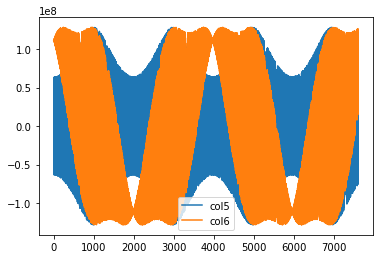

In [6]:
plt.plot(results['Xb'][:,4:6])
plt.legend(['col5', 'col6'])

# Saturn
Runs Boris in a Saturn magnetodisc for a proton of 100 MeV at initial position 4*Rp and
pitch angle 30 deg, for 2*tb, i.e. two dipole bounce periods, and save the
simulation data in file 'my_sat_mdisc_sim.pkl'.

In [7]:
mdfile = 'sat_mdisc_kh2e6_rmp20fix.mat' # magnetodisc mat-file
partype = 'p';                          # proton
Ep = 100;                               # energy 100 MeV
Ri = 4;                                 # initial equatorial distance 4*Rp
ai = 30;                                # initial pitch angle 30 degrees
timespec = [0,0,2,0];                   # run for 2 dipole bounce periods
savefile = 'my_sat_mdisc_sim';          # name for result mat-file
MD = load_model(config.PATH_TO_DATA + mdfile)
tracer_sat = MDBTracer(mdfile=mdfile,partype=partype,Ep=Ep,Ri=Ri,ai=ai,timespec=timespec,savefile=savefile)
results = tracer_sat.run_simul()

  0%|          | 0/297 [00:00<?, ?it/s]

classic v = 1.3841e+08 m/s; E=1.0000e+02 MeV 

relativ v = 1.2837e+08 m/s; E=1.0000e+02 MeV 

R=4.00; pitch angle=30; B=303.70 nT

tc=0.24 s, tb=7.12 s, td=501.09 s

pitcheq=30.00; lm=33.15 deg

|alpha| 30.00; |pi-alpha| 150.00; loss cone 5.34 deg

tmax=14.24 s = 59.57 tc = 2.00 tb = 0.03 td
Mirror point =  [141464566.0633105, 92407902.53489429, 0.0]
tm=0.0828, tm/dt=1.7277 tc/tm=2.8859, tc/dt=4.9860
BorisInit time elapsed:  0.0019965171813964844


100%|██████████| 297/297 [00:00<00:00, 1010.12it/s]

<Eb> = 100.00 MeV, std(E) = 1.97e-07 eV

L estimated = 3.90

**** Tbd=7.12 Tbe=7.48 Tbi=7.48 ****

Bounce: tb=7.45 +- 0.00 s lm=35.29 deg A=33.63 +- 0.05
Drfit: td=480.44+-3.07


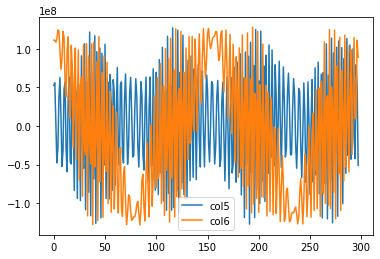

In [8]:
plt.plot(results['Xb'][:,4:6])
plt.legend(['col5', 'col6'])